<a href="https://colab.research.google.com/github/PAVARALASAISUPRIYA/fml-lab/blob/main/LogisticRegression_titanicDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

Load the titanic dataset.

In [ ]:
titanic = pd.read_csv('/content/Titanic.csv')

Explore the data in the titanic dataset.

In [ ]:
titanic.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone', 'survived'],
      dtype='object')

In [ ]:
titanic.head()

In [ ]:
titanic.describe

<bound method NDFrame.describe of         sex   age  sibsp  parch     fare embarked   class    who  alone  \
0      male  22.0      1      0   7.2500        S   Third    man  False   
1    female  38.0      1      0  71.2833        C   First  woman  False   
2    female  26.0      0      0   7.9250        S   Third  woman   True   
3    female  35.0      1      0  53.1000        S   First  woman  False   
4      male  35.0      0      0   8.0500        S   Third    man   True   
..      ...   ...    ...    ...      ...      ...     ...    ...    ...   
886    male  27.0      0      0  13.0000        S  Second    man   True   
887  female  19.0      0      0  30.0000        S   First  woman   True   
888  female   NaN      1      2  23.4500        S   Third  woman  False   
889    male  26.0      0      0  30.0000        C   First    man   True   
890    male  32.0      0      0   7.7500        Q   Third    man   True   

     survived  
0           0  
1           1  
2           1  
3

In [ ]:
titanic.shape

(891, 10)

Checking for null values in the data.

In [ ]:
titanic.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

In [ ]:
titanic['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

Replacing the null values.

In [ ]:
titanic['age']=titanic['age'].fillna(titanic.groupby(['class', 'sex'])['age'].transform('mean'))

In [ ]:
titanic.isnull().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
class       0
who         0
alone       0
survived    0
dtype: int64

In [1]:
titanic['age']=titanic['age'].fillna(titanic.groupby(['class', 'sex'])['age'].transform('mean'))

NameError: ignored

In [ ]:
titanic.shape

(891, 10)

In [ ]:
titanic=titanic.dropna()

In [ ]:
titanic.shape

(889, 10)

In [ ]:
X=titanic.iloc[:,:9]
y=titanic.iloc[:,8]

In [ ]:
X.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone'],
      dtype='object')

In [ ]:
X['sex'].unique()

array(['male', 'female'], dtype=object)

Transforming the string label data to the number format.

In [ ]:
le = LabelEncoder()

In [ ]:
X['sex']= le.fit_transform(X['sex'])

In [ ]:
X['embarked']=le.fit_transform(X['embarked'])

In [ ]:
X['class']=le.fit_transform(X['class'])

In [ ]:
X['who']=le.fit_transform(X['who'])

In [ ]:
X['alone']=le.fit_transform(X['alone'])

In [ ]:
X.shape, y.shape

((889, 9), (889,))

Split the data into the train and test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=46)

In [ ]:
X_train

,sex,age,sibsp,parch,fare,embarked,class,who,alone
434,1,50.000000,1,0,55.9000,2,0,1,0
851,1,74.000000,0,0,7.7750,2,2,1,1
257,0,30.000000,0,0,86.5000,2,0,2,1
334,0,34.611765,1,0,133.6500,2,0,2,0
883,1,28.000000,0,0,10.5000,2,1,1,1
...,...,...,...,...,...,...,...,...,...
443,0,28.000000,0,0,13.0000,2,1,2,1
373,1,22.000000,0,0,135.6333,0,0,1,1
553,1,22.000000,0,0,7.2250,0,2,1,1
839,1,41.281386,0,0,29.7000,0,0,1,1


In [ ]:
y_train.shape

(622,)

In [ ]:
X_train , X_test

(     sex        age  sibsp  parch      fare  embarked  class  who  alone
 434    1  50.000000      1      0   55.9000         2      0    1      0
 851    1  74.000000      0      0    7.7750         2      2    1      1
 257    0  30.000000      0      0   86.5000         2      0    2      1
 334    0  34.611765      1      0  133.6500         2      0    2      0
 883    1  28.000000      0      0   10.5000         2      1    1      1
 ..   ...        ...    ...    ...       ...       ...    ...  ...    ...
 443    0  28.000000      0      0   13.0000         2      1    2      1
 373    1  22.000000      0      0  135.6333         0      0    1      1
 553    1  22.000000      0      0    7.2250         0      2    1      1
 839    1  41.281386      0      0   29.7000         0      0    1      1
 190    0  32.000000      0      0   13.0000         2      1    2      1
 
 [622 rows x 9 columns],
      sex        age  sibsp  parch     fare  embarked  class  who  alone
 367    0  2

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
     

Load the logistic regression model and fit the model.

In [ ]:
model = LogisticRegression(C=0.3)
model.fit(X_train,y_train)
     

LogisticRegression(C=0.3)

Predict the outputs.

In [ ]:
y_train_pred=model.predict(X_train)

In [ ]:
y_train

434    False
851     True
257     True
334    False
883     True
       ...  
443     True
373     True
553     True
839     True
190     True
Name: alone, Length: 622, dtype: bool

In [ ]:
X_test = scaler.fit_transform(X_test)

In [ ]:
y_test_pred=model.predict(X_test)

In [ ]:
model.score(X_train,y_train)

1.0

In [ ]:
model.score(X_test,y_test_pred)

1.0

In [ ]:
cm=confusion_matrix(y_test, y_test_pred)

Visualize the results using confusion matrix.

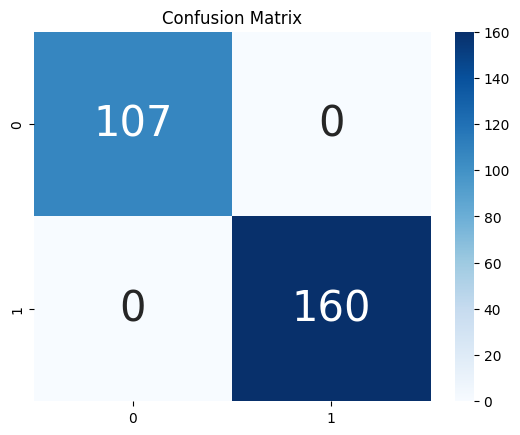

In [ ]:
import seaborn as sns
ax= plt.axes()
df_cm=cm
sns.heatmap(df_cm,annot=True,annot_kws={"size":30},fmt='d',cmap="Blues",ax=ax)
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
#more comprehensive report on the classification 
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00       107
        True       1.00      1.00      1.00       160

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267

